In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn")
pd.set_option('display.max_rows', None)

In [7]:
# lsit of tickers``
spac = ["AAPL", "BA", "KO", "IBM", "DIS", "MSFT" ]

In [47]:
cciv = yf.download("CCIV", start="2020-11-25",  end="2021-01-17", interval="30m")

[*********************100%***********************]  1 of 1 completed


In [9]:
cciv.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-11-20 09:30:00-05:00,9.7100,9.7272,9.7100,9.7164,9.7164,1608
2020-11-20 10:00:00-05:00,9.7164,9.7300,9.7000,9.7122,9.7122,621190
2020-11-20 10:30:00-05:00,9.7200,9.7200,9.7100,9.7100,9.7100,66190
2020-11-20 11:00:00-05:00,9.7188,9.7188,9.7188,9.7188,9.7188,302
2020-11-20 11:30:00-05:00,9.7200,9.7200,9.7100,9.7200,9.7200,2451


In [10]:
cciv = cciv.loc[:,["Close", "Volume"]]

In [11]:
cciv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 457 entries, 2020-11-20 09:30:00-05:00 to 2021-01-13 15:30:00-05:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   457 non-null    float64
 1   Volume  457 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 10.7 KB


In [12]:
np.max(cciv.Volume)

40879753

In [13]:
cciv_premerger = cciv.loc[:"2021-01-10"]

In [46]:
cciv_premerger.head()

,Close,Volume,max
Datetime,,,
2020-11-20 09:30:00-05:00,9.7164,1608,2207685
2020-11-20 10:00:00-05:00,9.7122,621190,2207685
2020-11-20 10:30:00-05:00,9.7100,66190,2207685
2020-11-20 11:00:00-05:00,9.7188,302,2207685
2020-11-20 11:30:00-05:00,9.7200,2451,2207685


In [15]:
cciv_premerger["max"] = cciv_premerger.Volume.max()

In [48]:
cciv_premerger.head()

,Close,Volume,max
Datetime,,,
2020-11-20 09:30:00-05:00,9.7164,1608,2207685
2020-11-20 10:00:00-05:00,9.7122,621190,2207685
2020-11-20 10:30:00-05:00,9.7100,66190,2207685
2020-11-20 11:00:00-05:00,9.7188,302,2207685
2020-11-20 11:30:00-05:00,9.7200,2451,2207685


In [17]:
cciv_merger = cciv.loc["2021-01-11"]

In [18]:
cciv_merger.head(50)


,Close,Volume
Datetime,,
2021-01-11 09:30:00-05:00,10.030,557623
2021-01-11 10:00:00-05:00,10.040,130273
2021-01-11 10:30:00-05:00,10.050,174022
2021-01-11 11:00:00-05:00,10.050,62634
2021-01-11 11:30:00-05:00,10.050,259533
2021-01-11 12:00:00-05:00,10.050,23611
2021-01-11 12:30:00-05:00,11.170,485292
2021-01-11 13:00:00-05:00,11.620,26242689
2021-01-11 13:30:00-05:00,12.330,20874057


In [19]:
cciv_merger.Volume.max()

26242689

In [20]:
data = {"name":[],"prevMax":[], "postMax":[]}

volume_df = pd.DataFrame(columns=["name", "prevMax", "postMax"])

In [21]:
volume_df.head()

,name,prevMax,postMax


In [22]:
cciv["returns"] = np.log(cciv.Close.div(cciv.Close.shift(1)))
cciv.dropna(inplace=True)

In [61]:

def maximize_returns(HtMP):
    highest_volume = 0
    position = 0
    cciv["position"] = 0
    cciv["strategy_returns"] = 0

    cciv["hVolume"] = highest_volume
    pos_length = 0
    buy_price = 0 
    pastVolumeHighs = []
    pastVolumeHighs.append(0)


    for bar in range(len(cciv)):
        if cciv["Volume"].iloc[bar] > highest_volume:
            pastVolumeHighs.append(cciv["Volume"].iloc[bar])
            highest_volume = cciv["Volume"].iloc[bar]
            cciv["hVolume"].iloc[bar] = highest_volume
           # print(bar, cciv.Close[bar], cciv.Volume[bar], cciv.hVolume[bar], sep = "|")
            if highest_volume > HtMP[1]* pastVolumeHighs[-2]:
                cciv.position.iloc[bar] = 1
                pos_length = int(HtMP[0])
                buy_price = cciv.Close.iloc[bar]
                
        if pos_length != 0:
            cciv.position.iloc[bar] = 1
            pos_length -= 1
        else:
            cciv.position.iloc[bar] = 0
            ##closing position
            if buy_price != 0:
                sell_price = cciv.Close.iloc[bar]
                print(f'buy price {buy_price} | sell price: {sell_price}')
                cciv["strategy_returns"].iloc[bar] =  get_returns(buy_price, sell_price) ###-1 * np.log(buy_price/sell_price)
                buy_price = 0

    cciv["cstrategy"] = cciv.strategy_returns.cumsum()

    return -cciv["cstrategy"].iloc[-1]


def get_returns(entryprice, closingprice):
   dif = closingprice - entryprice
   return dif/entryprice 


            
    
    
    

In [62]:
cciv.head()

,Open,High,Low,Close,Adj Close,Volume,position,strategy_returns,hVolume,cstrategy
Datetime,,,,,,,,,,
2020-11-25 09:30:00-05:00,9.76,9.760,9.7400,9.74,9.74,10633,1,0.0,10633,0.0
2020-11-25 10:00:00-05:00,9.75,9.750,9.7200,9.74,9.74,26004,1,0.0,26004,0.0
2020-11-25 10:30:00-05:00,9.75,9.750,9.7300,9.73,9.73,45493,1,0.0,45493,0.0
2020-11-25 11:00:00-05:00,9.72,9.740,9.7200,9.73,9.73,12392,1,0.0,0,0.0
2020-11-25 11:30:00-05:00,9.73,9.745,9.7299,9.74,9.74,6562,1,0.0,0,0.0


In [63]:
maximize_returns((8,2))

buy price 9.739999771118164 | sell price: 9.8100004196167
buy price 9.84000015258789 | sell price: 9.850000381469727
buy price 11.619999885559082 | sell price: 14.90999984741211


-0.29133573809933183

In [54]:
print(np.log(9.70/9.73))

-0.0030880106885767277


In [1]:
cciv.tail(5)

NameError: name 'cciv' is not defined

In [56]:
from scipy.optimize import brute

In [64]:
brute(maximize_returns, ((1,15,1), (1,15,1)), finish=None)

e: 13.100000381469727
buy price 9.739999771118164 | sell price: 9.739999771118164
buy price 9.739999771118164 | sell price: 9.739999771118164
buy price 11.619999885559082 | sell price: 13.100000381469727
buy price 9.739999771118164 | sell price: 9.739999771118164
buy price 9.739999771118164 | sell price: 9.739999771118164
buy price 11.619999885559082 | sell price: 13.100000381469727
buy price 9.739999771118164 | sell price: 9.739999771118164
buy price 11.619999885559082 | sell price: 13.100000381469727
buy price 9.739999771118164 | sell price: 9.739999771118164
buy price 11.619999885559082 | sell price: 13.100000381469727
buy price 9.739999771118164 | sell price: 9.739999771118164
buy price 11.619999885559082 | sell price: 13.100000381469727
buy price 9.739999771118164 | sell price: 9.739999771118164
buy price 11.619999885559082 | sell price: 13.100000381469727
buy price 9.739999771118164 | sell price: 9.739999771118164
buy price 11.619999885559082 | sell price: 13.100000381469727
buy 

array([8., 2.])

In [113]:
maximize_returns(4)

TypeError: 'int' object is not subscriptable

In [ ]:
cciv["strategy_returns"].sum()

In [ ]:
cciv["cstrategy"] = cciv.strategy_returns.cumsum()

In [66]:
cciv.head()

,Open,High,Low,Close,Adj Close,Volume,position,strategy_returns,hVolume,cstrategy
Datetime,,,,,,,,,,
2020-11-25 09:30:00-05:00,9.76,9.760,9.7400,9.74,9.74,10633,1,0.0,10633,0.0
2020-11-25 10:00:00-05:00,9.75,9.750,9.7200,9.74,9.74,26004,1,0.0,26004,0.0
2020-11-25 10:30:00-05:00,9.75,9.750,9.7300,9.73,9.73,45493,1,0.0,45493,0.0
2020-11-25 11:00:00-05:00,9.72,9.740,9.7200,9.73,9.73,12392,1,0.0,0,0.0
2020-11-25 11:30:00-05:00,9.73,9.745,9.7299,9.74,9.74,6562,1,0.0,0,0.0


<AxesSubplot:xlabel='Datetime'>

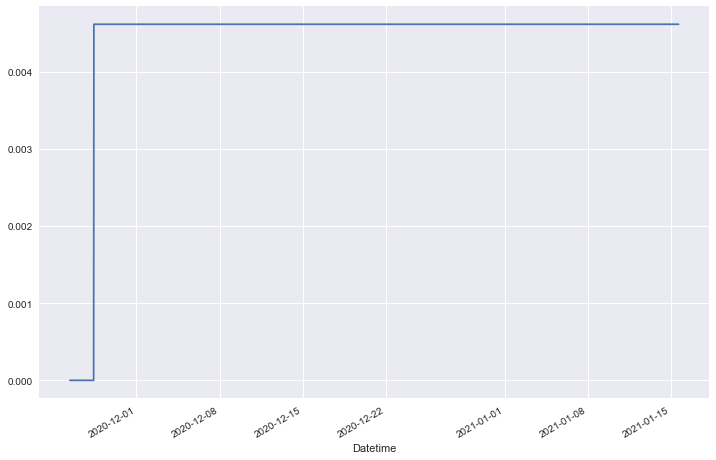

In [67]:
cciv.cstrategy.plot(figsize = (12,8)) 